# Prediction of Amount spent

## Problem Statement

- Predicting the amount spent based upon different features

In [1]:
#Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [20]:
#Importing the data set

df = pd.read_excel("Xiaomi Website Data.xlsx")

In [21]:
#Viewing the dataset

df.head()

,Customer,Day,Browser,Clicks,Pages,Time,Amount
0,1,Wednesday,Chrome,8,5,5.0,3648.0
1,2,Tuesday,Internet Explorer,23,4,15.9,6744.0
2,3,Saturday,Internet Explorer,20,6,13.3,5404.0
3,4,Sunday,Chrome,16,2,11.4,3604.0
4,5,Sunday,Chrome,16,4,11.8,3717.0


## Encoding the categorical variables

In [22]:
#Encoding the day column in df
def day_int(num):
    num_int = {"Sunday":1,"Monday":2,"Tuesday":3,"Wednesday":4,"Thursday":5,"Friday":6,"Saturday":7 }
    return num_int[num]
df['Day'] = df['Day'].apply(lambda x : day_int(x))

In [23]:
df.head()

,Customer,Day,Browser,Clicks,Pages,Time,Amount
0,1,4,Chrome,8,5,5.0,3648.0
1,2,3,Internet Explorer,23,4,15.9,6744.0
2,3,7,Internet Explorer,20,6,13.3,5404.0
3,4,1,Chrome,16,2,11.4,3604.0
4,5,1,Chrome,16,4,11.8,3717.0


In [24]:
#Encoding the Browser in df
df.Browser.unique()

array(['Chrome', 'Internet Explorer', 'Firefox', 'Safari', 'Opera'],
      dtype=object)

In [25]:
def browser_int(bro):
    brow = {"Chrome":1, "Internet Explorer":2,"Firefox":3,"Safari":4,"Opera":5}
    return brow[bro]
df['Browser'] = df['Browser'].apply(lambda x : browser_int(x))

In [26]:
df.head()

,Customer,Day,Browser,Clicks,Pages,Time,Amount
0,1,4,1,8,5,5.0,3648.0
1,2,3,2,23,4,15.9,6744.0
2,3,7,2,20,6,13.3,5404.0
3,4,1,1,16,2,11.4,3604.0
4,5,1,1,16,4,11.8,3717.0


## Outlier treatment

(array([1029., 2004., 4003., 4788., 4369., 4045., 2035., 1503.,  989.,
         525.]),
 array([ 8. , 11.8, 15.6, 19.4, 23.2, 27. , 30.8, 34.6, 38.4, 42.2, 46. ]),
 <a list of 10 Patch objects>)

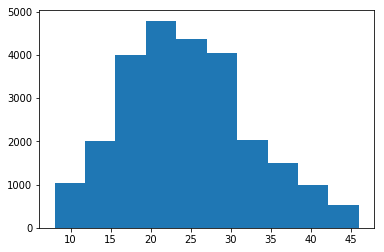

In [9]:
#Histogram
plt.hist(df['Clicks'])

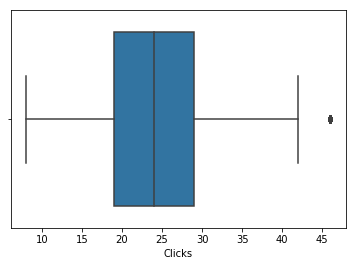

In [10]:
#boxplot
sns.boxplot(df['Clicks'])
#Outliers are present

(array([3531., 3069., 6023., 4139.,    0., 3458., 3038.,  514.,  499.,
        1019.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

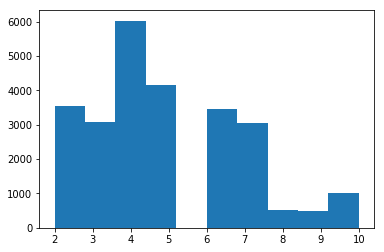

In [11]:
plt.hist(df['Pages'])

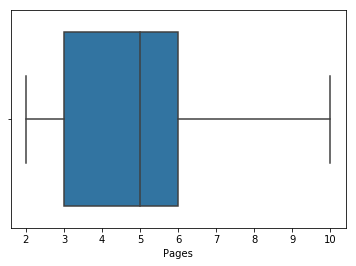

In [12]:
sns.boxplot(df['Pages'])

(array([1.0000e+03, 1.0123e+04, 9.6260e+03, 2.0140e+03, 1.5520e+03,
        9.7300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <a list of 10 Patch objects>)

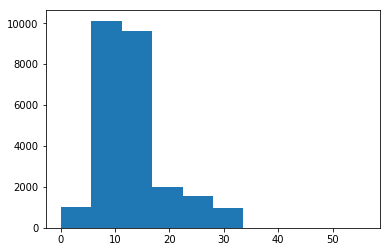

In [13]:
plt.hist(df['Time'])

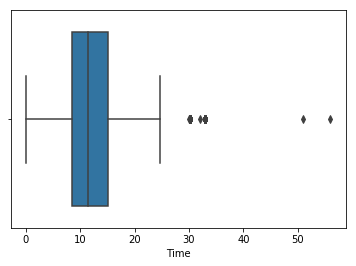

In [14]:
sns.boxplot(df['Time'])
#Outliers are present

In [15]:
#Treating outliers for No. of clicks

temp_df = df[(df['Clicks'] <=40) & (df['Clicks']>= 5)]
temp_df.head()

,Customer,Day,Browser,Clicks,Pages,Time,Amount
0,1,4,1,8,5,5.0,3648.0
1,2,3,2,23,4,15.9,6744.0
2,3,7,2,20,6,13.3,5404.0
3,4,1,1,16,2,11.4,3604.0
4,5,1,1,16,4,11.8,3717.0


In [16]:
df = temp_df

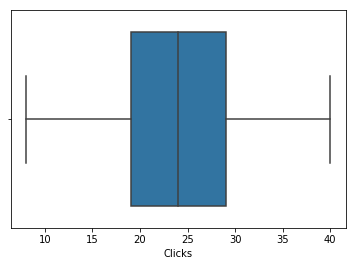

In [17]:
sns.boxplot(df['Clicks'])

In [18]:
#Treating outliers for Time(min)
temp2_df = df[(df['Time'] <= 20) & (df['Time']>= 4)]
temp2_df.head()

,Customer,Day,Browser,Clicks,Pages,Time,Amount
0,1,4,1,8,5,5.0,3648.0
1,2,3,2,23,4,15.9,6744.0
2,3,7,2,20,6,13.3,5404.0
3,4,1,1,16,2,11.4,3604.0
4,5,1,1,16,4,11.8,3717.0


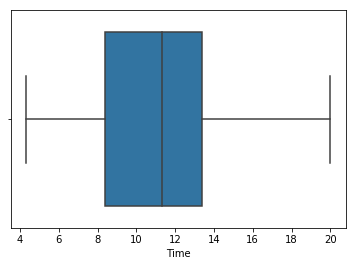

In [19]:
sns.boxplot(temp2_df['Time'])

(array([1500., 2042., 3052., 3024., 5542., 2545., 1504., 1537., 1515.,
         498.]),
 array([ 4.3 ,  5.87,  7.44,  9.01, 10.58, 12.15, 13.72, 15.29, 16.86,
        18.43, 20.  ]),
 <a list of 10 Patch objects>)

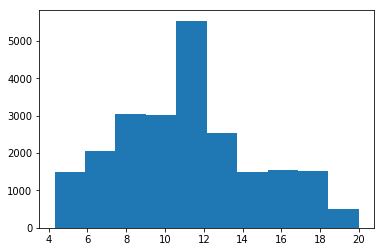

In [20]:
plt.hist(temp2_df['Time'])

In [21]:
df = temp2_df

df.count(axis=0)

## Treatment of missing values

In [22]:
df.isnull().sum()
#There are no missing values

Customer    0
Day         0
Browser     0
Clicks      0
Pages       0
Time        0
Amount      0
dtype: int64


## Train, Test, Split

In [37]:
new_df = df

In [38]:
new_df.pop('Customer')

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
31          32
         ...  
25256    25257
25258    25259
25259    25260
25260    25261
25261    25262
25262    25263
25263    25264
25264    25265
25265    25266
25266    25267
25268    25269
25270    25271
25271    25272
25272    25273
25273    25274
25274    25275
25275    25276
25276    25277
25277    25278
25278    25279
25279    25280
25280    25281
25281    25282
25282    25283
25283    25284
25284    25285
25285    25286
25286    25287
25287    25288
25288    25289
Name: Customer, Length: 22759, dtype: int64

In [39]:
new_df.head()

,Day,Browser,Clicks,Pages,Time,Amount
0,4,1,8,5,5.0,3648.0
1,3,2,23,4,15.9,6744.0
2,7,2,20,6,13.3,5404.0
3,1,1,16,2,11.4,3604.0
4,1,1,16,4,11.8,3717.0


In [40]:
X = new_df[new_df.columns.difference(['Amount'])]

In [42]:
Y = pd.DataFrame(columns=["Amount"],data=new_df['Amount'])

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [44]:
print("Size of train data is ", len(X_train))
print("Size of test data is ", len(X_test))
print("Size of dataframe data is ", len(new_df))

Size of train data is  18207
Size of test data is  4552
Size of dataframe data is  22759


## Model building

In [47]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
Prediction = model.predict(X_test)

In [56]:
#Creating a user defined function for rmse
def rmse(x,y):
    r = x-y
    q = r*r
    s = np.average(q)
    t  = np.sqrt(s)
    return t
    
    

In [58]:
rmse_ans = rmse(Y_test,Prediction)
rmse_ans

1224.580344388555

In [62]:
Percentage_error = [rmse_ans*100/np.average(Y_test)]
Percentage_error

[19.40159097187487]